<center><h1><u>Part 4 :Examining Volcanos and Earthquakes</h1></center></u>

<h4><center>By Natalie Marcom</h4></center>

<center><b>There are approximetely 1,500 active volcanos on earth.</center></b>

In [14]:
import requests
from lxml import html
from mpl_toolkits.basemap import Basemap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's plot all 1500 volcanos on a map to see where most of them are located. Due to the difficulty to acquire a reasonable dataset of volcanos, besides a shapefile from Arcmap, we will scrape from a website that indicates the Latitude and longiude of all the volcanos to make plotting easy. We will also plot the volcanos on a basemap by the size of the volcano, via it's elevation height in meters.

In [15]:
page = requests.get('http://volcano.oregonstate.edu/oldroot/volcanoes/alpha.html')
tree = html.fromstring(page.content)
tables = tree.xpath('//table')

volcano_data = []
for volc in range(4, len(tables)):
    df = pd.read_html(html.tostring(tables[volc]), header=0)[0]
    volcano_data.append(df)

In [16]:
df_volc = pd.concat(volcano_data, ignore_index=True)


In [17]:
df_volc.head(10)

,Name,Location,Type,Latitude,Longitude,Elevation (m)
0,Abu,Honshu-Japan,Shield volcanoes,34.50,131.60,641.0
1,Acamarachi,Chile-N,Stratovolcano,-23.30,-67.62,6046.0
2,Acatenango,Guatemala,Stratovolcano,14.50,-90.88,3976.0
3,Acigöl-Nevsehir,Turkey,Caldera,38.57,34.52,1689.0
4,Adams,US-Washington,Stratovolcano,46.21,-121.49,3742.0
5,Adams Seamount,Pacific-C,Submarine volcano,-25.37,-129.27,-39.0
6,Adatara,Honshu-Japan,Stratovolcanoes,37.64,140.29,1718.0
7,Adwa,Ethiopia,Stratovolcano,10.07,40.84,1733.0
8,Afderà,Ethiopia,Stratovolcano,13.08,40.85,1295.0
9,Agrigan,Mariana Is-C Pacific,Stratovolcano,18.77,145.67,965.0


However, besides plotting the volcanos on a map, let us take it a step further and plot volcanos as well as data that indicates whether one of these volcanos, had an eruption that was associated with an earthquake.  We will use two datasets to answer this question. The second dataset with the earthquake information mainly looks at volcano eruptions from 1790 to the present. I have decided to look at world volcanos for that data and not focus on a particular region of the world.

<h1><u><center>How many of the volcanos have had eruptions that were associated with earthquakes?</center></h1></u>

In [12]:
import os
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('C:\Users\jenat\Documents')
#second dataset
data=pd.read_csv("new_world_data_results_up1.csv")

In [13]:
data

,Year,Month,Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,Elevation,Type,Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1610.0,NaN,NaN,TSU,EQ,Santorini,Greece,Greece,36.404,25.396,329.0,Shield volcano,Historical
2,766.0,7.0,20.0,TSU,EQ,Sakura-jima,Kyushu-Japan,Japan,31.580,130.670,1117.0,Stratovolcano,Historical
3,1169.0,2.0,4.0,TSU,EQ,Etna,Italy,Italy,37.734,15.004,3350.0,Stratovolcano,Historical
4,1565.0,8.0,NaN,NaN,EQ,Pacaya,Guatemala,Guatemala,14.381,-90.601,2552.0,Complex volcano,Historical
5,1600.0,2.0,19.0,NaN,EQ,Huaynaputina,Peru,Peru,-16.608,-70.850,4850.0,Stratovolcano,Historical
6,1631.0,2.0,14.0,NaN,EQ,Dama Ali,Africa-NE,Ethiopia,11.280,41.630,1068.0,Shield volcano,Historical
7,1631.0,12.0,16.0,TSU,EQ,Vesuvius,Italy,Italy,40.821,14.426,1281.0,Complex volcano,Historical
8,1640.0,7.0,31.0,TSU,EQ,Komaga-take,Hokkaido-Japan,Japan,42.070,140.680,1140.0,Stratovolcano,Historical
9,1659.0,9.0,30.0,NaN,EQ,San Salvador,El Salvador,El Salvador,13.736,-89.286,1893.0,Stratovolcano,Historical


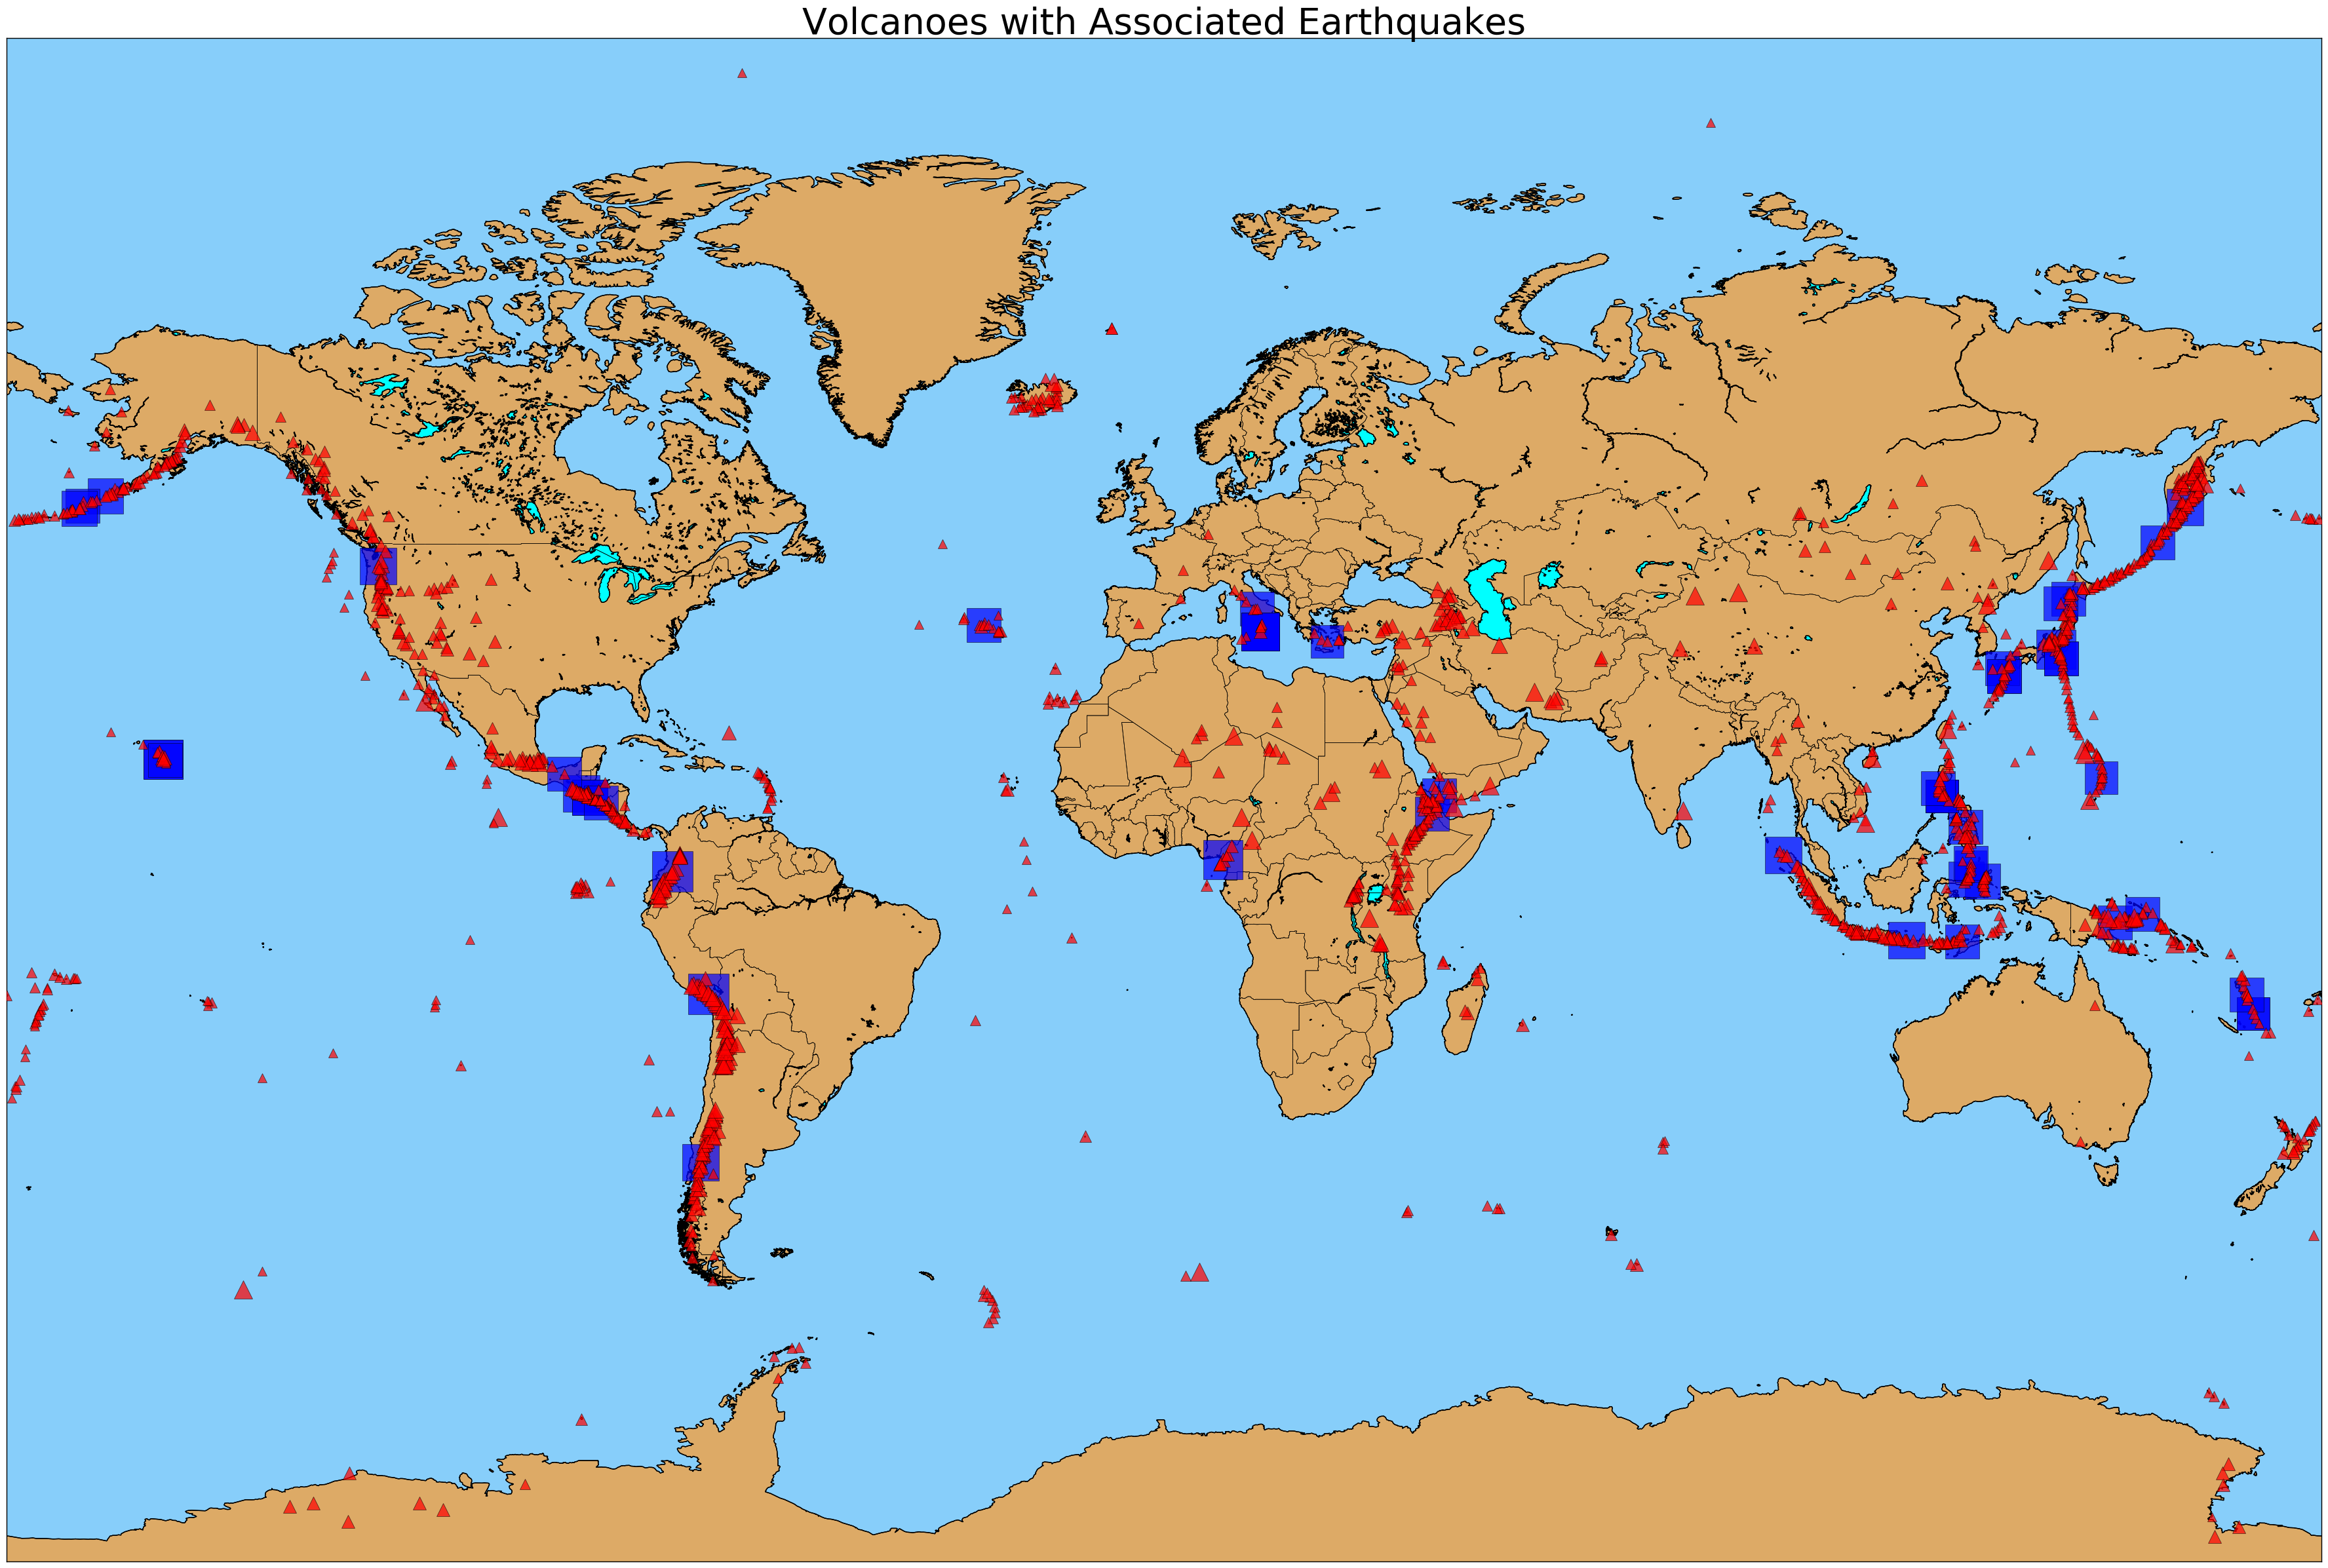

In [8]:
def plot_map2(lons, lats, elevations, llcrnrlat=-80, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,resolution='i', projection='mill', lat_0 = 39.5, lon_0 = 1,min_marker_size=5):
    bins = np.linspace(0, elevations.max(), 10)
    marker_sizes = np.digitize(elevations, bins) + min_marker_size
    m2 = Basemap(projection=projection, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution=resolution)
    m2.drawcountries()
    m2.drawmapboundary(fill_color='lightskyblue')
    m2.fillcontinents(color = '#ddaa66',lake_color='aqua')
    m2.drawcoastlines()

    for lon, lat, m2size in zip(lons, lats, marker_sizes):
        x, y = m2(lon, lat)
        m2.plot(x, y, 'bs', markersize=m2size, alpha=.7, zorder=4)

    return m2

def plot_map1(lons, lats, elevations, llcrnrlat=-80, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180,resolution='i', projection='mill', lat_0 = 39.5, lon_0 = 1,min_marker_size=2):
    bins = np.linspace(0, elevations.max(), 10)
    marker_sizes = np.digitize(elevations, bins) + min_marker_size

    m = Basemap(projection=projection, llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, resolution=resolution)
    m.drawcountries()
    m.drawmapboundary(fill_color='lightskyblue')
    m.fillcontinents(color = '#ddaa66',lake_color='aqua')
    m.drawcoastlines()

    for lon, lat, msize in zip(lons, lats, marker_sizes):
        x, y = m(lon, lat)
        m.plot(x, y, '^r', markersize=msize, alpha=.7, zorder=4)

    return m

plt.figure(figsize=(60, 30))
m2 = plot_map2(data['Longitude'], data['Latitude'], data['Elevation'], min_marker_size=35)
m = plot_map1(df_volc['Longitude'], df_volc['Latitude'], df_volc['Elevation (m)'], min_marker_size=10)


plt.title('Volcano Eruptions with Associated Earthquakes', color='#000000', fontsize=50)

plt.show()

The red triangles indicate the volcanos, and the blue squares indicate the volcanos who had an association with an earthquake prior to its eruption. Out of 1500 volcanos, there were about 55 volcanic eruptions that had this association. Many have these occurred in the 20th century. We also see that the majority of these earthquake and volcano association have happened along the ring of fire, which stretches along the Eastern edge of Asia, down to New Zealand, as well as from Alaska down to South America.

<h1><center><u>Closer Examination of Volcano Eruptions with Associated Earthquakes</h1></u></center>

In [24]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

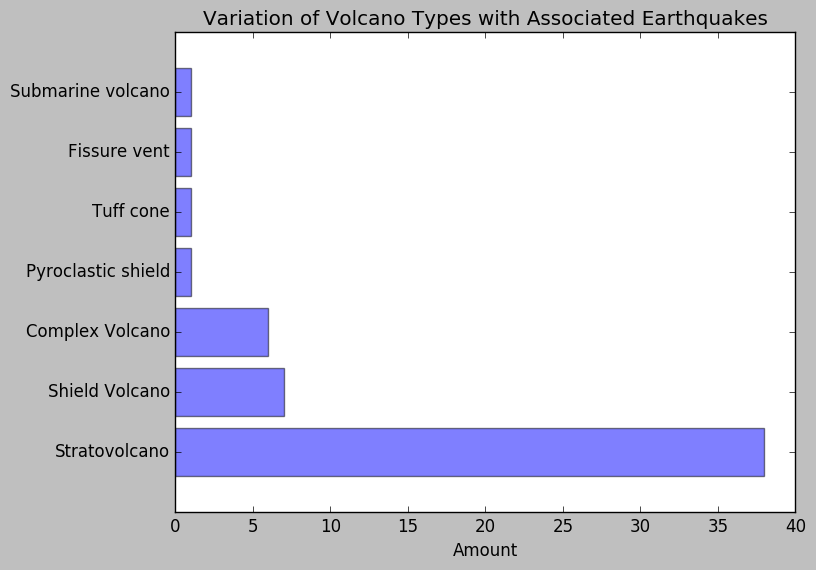

In [44]:
objects = ('Stratovolcano', 'Shield Volcano', 'Complex Volcano', 'Pyroclastic shield', 'Tuff cone', 'Fissure vent','Submarine volcano')
y_pos = np.arange(len(objects))
performance = [38,7,6,1,1,1,1]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Amount')
plt.title('Variation of Volcano Types with Associated Earthquakes')
plt.show()

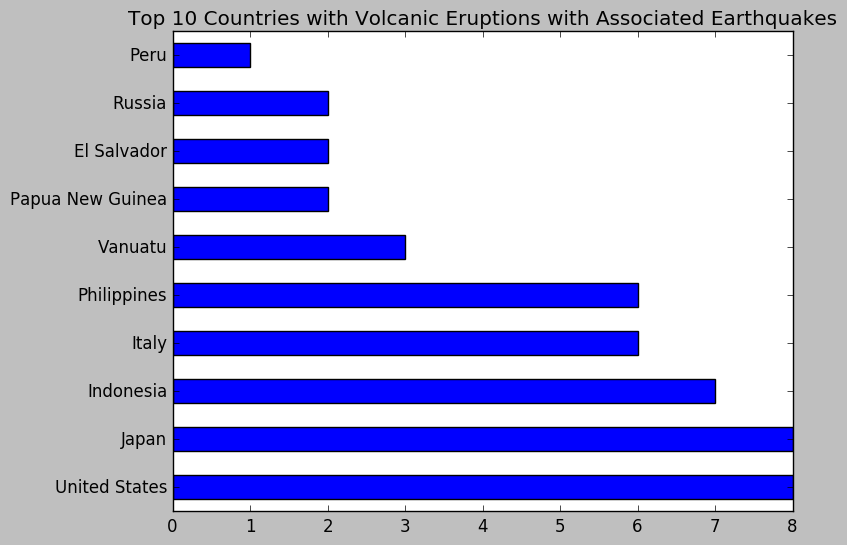

In [61]:
data['Country'].value_counts()[:10].plot(kind = 'barh', title = 'Top 10 Countries with Volcanic Eruptions with Associated Earthquakes')
plt.show()

<h1><center><u>Examining link between Earthquakes and Volcanic eruptions</u></center></h1>

It is not very easy to show the links between earthquakes and volcanos. Scientists still are debating whether they are connected or not, and there is a lack of information available that proved that the two are substantially linekd to one or the other. However, I have found enough data indicating that earthquakes do occur near volcanos, which can suggest that it is *possible* for earthquakes and volcanos to be somewhat linked.

In [77]:
import os
os.chdir('C:\Users\jenat\\Documents\\ringoffire')
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
earth = pd.read_csv('earth_near_volccc.csv')#dataset

In [78]:
earth

,Weekday,Time,Mag,Depth,Nearest Volcano,Location,Latitude,Longitude
0,"Wed,",8 Mar 03:56 UTC,4.1,5.4,Bardarbunga (4 km) -,Central Iceland,64.6250,-17.4460
1,"Sun,",5 Mar 00:08 UTC,5.5,10.0,Paco (14 km),"Mindanao, Philippines",9.6000,125.4400
2,"Fri,",10 Mar 02:23 UTC,3.5,8.5,Rausu (16 km),SHIRETOKO PENINSULA REG,43.9550,145.0100
3,"Fri,",10 Mar 00:49 UTC,3.6,7.6,Rausu (16 km),SHIRETOKO PENINSULA REG,43.9550,145.0100
4,"Thu,",9 Mar 22:13 UTC,3.2,10.1,Sanbe (6km),Shimane Hiroshima Border,35.0970,132.6780
5,"Thu,",9 Mar 10:51 UTC,3.6,13.0,Sabancaya (15 km),Peru,-15.6700,-71.7700
6,"Thu,",9 Mar 08:31 UTC,3.2,2.7,Mauna Loa (7 km) -,"Big Island, Hawai'ii",19.4140,-155.6240
7,"Wed,",8 Mar 14:59 UTC,3.0,1.0,Bardarbunga (7 km) -,Central Iceland,64.6230,-17.3790
8,"Wed,",8 Mar 04:38 UTC,3.9,11.0,Sabancaya (20 km),Peru,-15.6600,-71.7100
9,"Wed,",8 Mar 03:56 UTC,4.1,5.4,Bardarbunga (4 km) -,Central Iceland,64.6250,-17.4460


In [79]:


#earth.Latitude
#earth.Longitude


def earth_near(lons, lats, magnitude, min_marker_size=2):
    bins = np.linspace(0, magnitude.max(), 10)
    marker_sizes = np.digitize(magnitude, bins) + min_marker_size

    m = Basemap()
    m.bluemarble(alpha=0.42)

    for lon, lat, msize in zip(lons, lats, marker_sizes):
        x, y = m(lon, lat)
        m.plot(x, y, '^r', markersize=msize, alpha=.7, zorder=4)

    return m
    



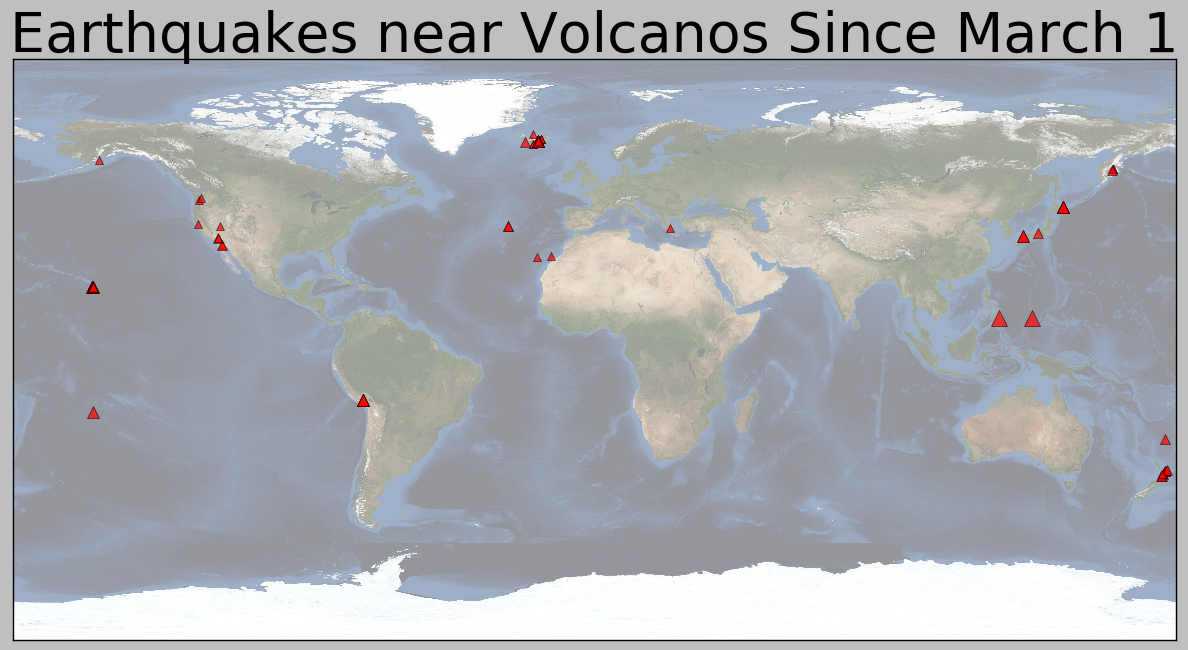

In [80]:
plt.figure(figsize=(15, 12))
m = earth_near(earth['Longitude'], earth['Latitude'], earth['Mag'], min_marker_size=2)
plt.title('Earthquakes near Volcanos Since March 1', color='#000000', fontsize=40)
plt.show()

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

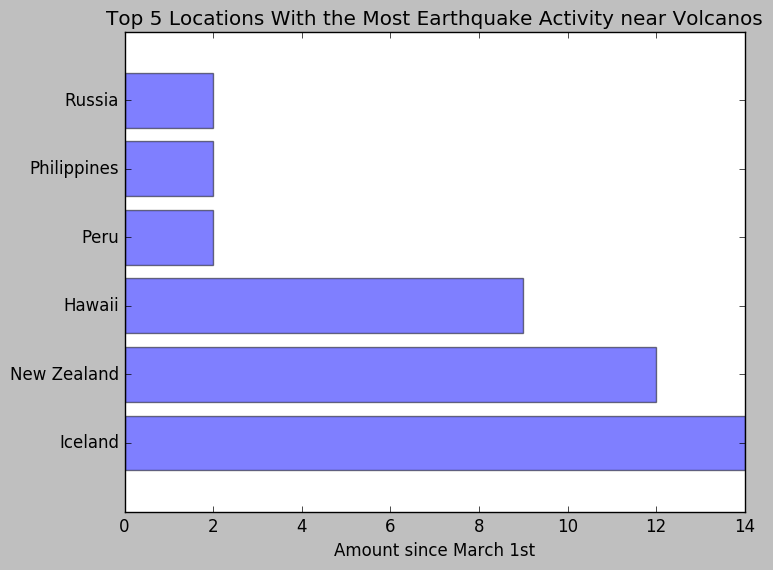

In [36]:
objects = ('Iceland', 'New Zealand', 'Hawaii', 'Peru', 'Philippines', 'Russia')
y_pos = np.arange(len(objects))
amount = [14,12,9,2,2,2]
plt.barh(y_pos, amount, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Amount since March 1st')
plt.title('Top 5 Locations With the Most Earthquake Activity near Volcanos')
plt.show()

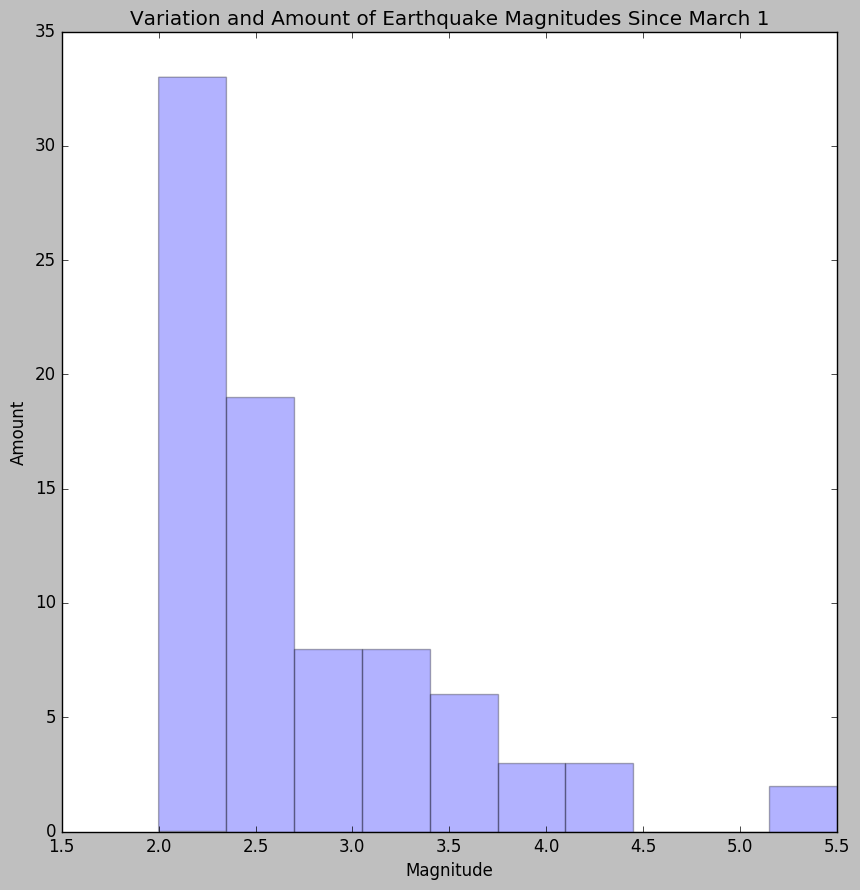

In [62]:
plt.figure(figsize=(10,10))
plt.hist(earth['Mag'], bins = 10, alpha = 0.3)
plt.xlabel('Magnitude')
plt.ylabel('Amount')
plt.title("Variation and Amount of Earthquake Magnitudes Since March 1")
plt.show()

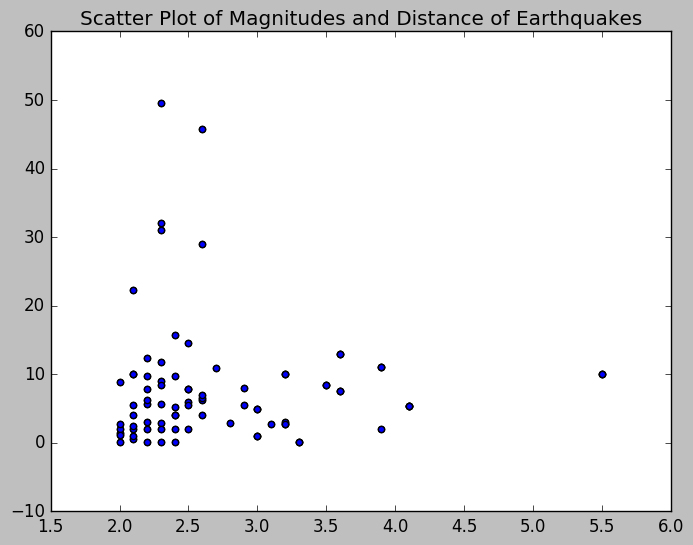

In [84]:
import matplotlib.pyplot
import pylab
import os
os.chdir('C:\Users\jenat\\Documents\\ringoffire')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
tes3 = pd.read_csv('earth_near_volccc.csv',usecols = [2,3])#dataset

matplotlib.pyplot.scatter(tes3.Mag,tes3.Depth)
matplotlib.pyplot.title('Scatter Plot of Magnitudes and Distance of Earthquakes')
matplotlib.pyplot.show()

As we can see, there is not a strong correlation between Magnitudes of earthquakes and the distance of the earthquakes.

In [81]:
import os
os.chdir('C:\Users\jenat\\Documents\\ringoffire')
import pandas as pd
tes3 = pd.read_csv('earth_near_volccc.csv',usecols = [2,3])#dataset with just column 2 and 3
tes3.corr()

tes3.corr(method='spearman', min_periods=1)

,Mag,Depth
Mag,1.000000,0.178553
Depth,0.178553,1.000000


The matrix correlation, using the spearman test concerning the two columns magnitude and Depth, indicates too that there is not a strong correlation between Magnitude and Depth. According to research, this is in fact a 'good' thing, as "the distance from the epicentre and magnitude should be as close as possible to the epicentre"

<b>CONCLUSION</b>

There is not enough scientific evidence, or data to link earthquakes and volcano eruptions as being statistically significant to one another. More specifically, if an Earthquake can cause a volcanic eruption. While scientists are still debating the connection between the two, there is evidence that earthquakes occur (and rather frequently) near volcanos. With that information given, this brings the possibility that it is possible for earthquakes and volcanos to correlate with one another.